<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


___________________________________

In [73]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc


In [74]:
df = pd.read_pickle("../datos/df_nonulls_encoded_sinout_estand.pkl")
df["is_fraudulent"] = df["is_fraudulent"].astype("int")
df

,customer_id,merchant_id,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount_minmax,customer_age_minmax,is_fraudulent
0,0.540537,0.517856,0.497382,0.524610,0.0,0.0,1.0,0.0,0.575423,0.480769,0
1,0.543680,0.536825,0.529126,0.486978,0.0,0.0,0.0,1.0,0.189301,0.826923,1
2,0.586109,0.506026,0.600000,0.524610,0.0,0.0,1.0,0.0,0.123960,0.750000,1
3,0.543680,0.525765,0.600000,0.505313,0.0,1.0,0.0,0.0,0.761671,0.788462,1
4,0.470012,0.523806,0.497382,0.513546,0.0,0.0,1.0,0.0,0.188153,0.346154,1
...,...,...,...,...,...,...,...,...,...,...,...
9724,0.534061,0.548068,0.497608,0.479829,0.0,0.0,1.0,0.0,0.893437,0.346154,1
9725,0.504951,0.523362,0.481651,0.513546,0.0,0.0,1.0,0.0,0.001956,0.461538,0
9726,0.514017,0.451935,0.574468,0.486978,1.0,0.0,0.0,0.0,0.632990,0.346154,0
9727,0.484857,0.435902,0.537688,0.513546,0.0,0.0,0.0,1.0,0.282959,0.750000,1


Inicializamos la clase y entrenamos al modelo de regresión logística.

In [75]:
vr="is_fraudulent"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

In [76]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

Veamos las métricas que nos da:

In [77]:
modelo_clasificacion.calcular_metricas("logistic_regression")

,accuracy,precision,recall,f1,kappa,auc
train,0.562251,0.562151,0.562251,0.562011,0.124019,0.587846
test,0.567831,0.567558,0.567831,0.567442,0.134473,0.581188


- El principal problema que observamos al hacer el modelo es la variable Kappa tan bajo que hemos obtenido. Esta variable indica el efecto del azar en la proporción de la concordancia observada, siendo tan cercana al 0 indica que nuestras métricas son puro azar.
- El auc indica el area por debajo de la curva de roc, el óptimo sería 1, por lo que 0.58 es una métrica bastante baja. Podemos observar la curva más adelante.
- Accuracy incica cómo de bien estoy prediciendo los casos verdaderos, siendo un 0,5 un dato bastante bajo.
- Precision indica cómo de seguros estamos de que los casos positivos PREDICHOS son correctos y recall dice que de todos los casos REALMENTE positivos cuántos acierto. Viendo a continuación la matriz de confusión vemos que hay muchos FP y FN hay, sin embargo lo que más nos preocupa son los FN, ya que no queremos que ocurra que hya una transacción fraudulenta y que se prediga que no es anómala. Por lo que preferimos unos FN más bajos y unos FP más altos, por lo tanto, vamos a busacr un recall más alto y una precisión más baja.

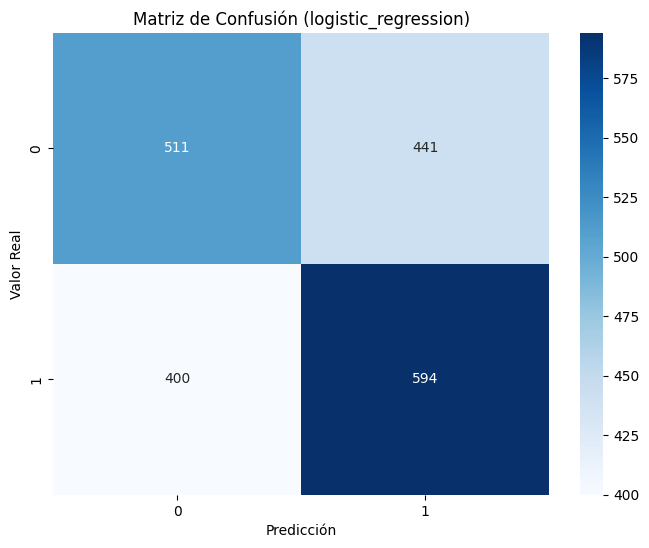

In [78]:
modelo_clasificacion.plot_matriz_confusion("logistic_regression")

Podemos ver que tenemos 511 verdaderos negativos y 594 verdaderos positivos pero 441 falsos positivos y 400 falsos negativos, son estos 400 falsos negativos los que tenemos que estudiar e intentar ver qué pasa.

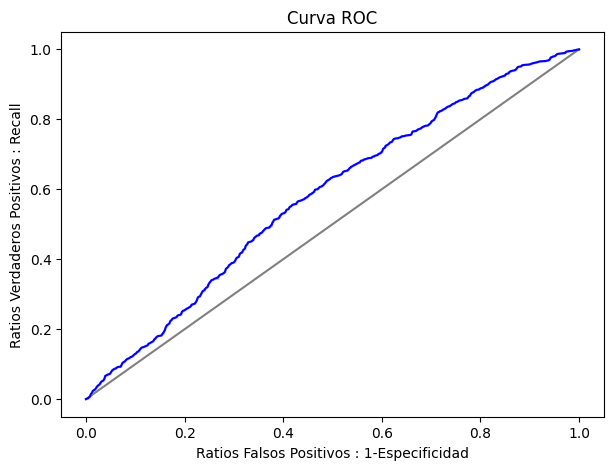

In [79]:
modelo_clasificacion.curva_roc("logistic_regression")

Como podemos ver la curva ROC se acerca mucho a la recta x=y la cual indica que la predicción es totalmente al azar lo que explica de forma visual la kappa obtenida.

_________________________________________________________

Vamos a intentar ver cuales son esos 400 valores de los falsos negativos.

In [104]:
X_train, X_test, y_train, y_test = modelo_clasificacion.get_train_test()
modelos = modelo_clasificacion.get_modelos()

df_errores = pd.DataFrame()
df_errores = pd.concat([df_errores, X_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.DataFrame(modelos["logistic_regression"]["pred_test"])], axis=1)
df_errores.rename(columns={"is_fraudulent":"y_test", 0:"y_test_pred"}, inplace=True)

#FN: y_test=1 y y_test_pred=0
filtro = (df_errores["y_test"]==1) & (df_errores["y_test_pred"]==0)
df_errores=df_errores[filtro]

In [ ]:
# Cargamos los pickles

with open('../datos/preprocesamiento/one_hot_encoder.pkl', 'rb') as f:
    one_hot_encoder = pickle.load(f)
    
with open('../datos/preprocesamiento/target_mappings.pkl', 'rb') as f:
    target_mappings = pickle.load(f)

with open('../datos/preprocesamiento/minmax_scaler.pkl', 'rb') as f:
    minmax = pickle.load(f)


In [ ]:
df_errores_final = df_errores.copy()

In [107]:
# Primero desestandarizo las numéricas
original_values = minmax.inverse_transform(df_errores[["amount_minmax",	"customer_age_minmax"]])
df_errores_final[["amount", "age"]]=original_values
df_errores_final.drop(columns=["amount_minmax",	"customer_age_minmax"], inplace=True)

In [ ]:
#Deshacemos el one-hot
columns_to_inverse = ['card_type_American Express', 'card_type_Discover',
                      'card_type_MasterCard', 'card_type_Visa']
encoded_data = df_errores_final[columns_to_inverse]

original_values = one_hot_encoder.inverse_transform(encoded_data)
df_errores_final["card_type_original"] = original_values.ravel()

columns_to_drop = one_hot_encoder.get_feature_names_out()
df_errores_final = df_errores_final.drop(columns=columns_to_drop)
df_errores_final


,customer_id,merchant_id,location,purchase_category,y_test,y_test_pred,amount,age,card_type_original
2,0.514017,0.427355,0.522843,0.479829,1,0,2766.30,66.0,American Express
3,0.464356,0.435902,0.518325,0.505313,1,0,212.79,60.0,MasterCard
13,0.482760,0.524747,0.441315,0.479829,1,0,2370.31,35.0,American Express
20,0.564339,0.500001,0.452381,0.486978,1,0,5249.50,36.0,MasterCard
22,0.489144,0.525765,0.461078,0.529551,1,0,9065.78,37.0,Visa
...,...,...,...,...,...,...,...,...,...
1928,0.423654,0.517856,0.497585,0.529551,1,0,5393.57,22.0,Visa
1934,0.500006,0.463937,0.541237,0.505313,1,0,7856.38,47.0,MasterCard
1939,0.500001,0.504762,0.484536,0.513546,1,0,3278.98,57.0,Discover
1942,0.490743,0.517856,0.450000,0.486978,1,0,5362.18,54.0,American Express


In [ ]:
#Deshacemos el target
df_errores_desestand_decoded = df_errores_final.copy()
for column in target_mappings:
    reverse_mapping = {v: k for k, v in target_mappings[column].to_dict().items()}
    df_errores_desestand_decoded[column] = df_errores_final[column].map(reverse_mapping)


customer_id
merchant_id
location
purchase_category


In [111]:
df_errores_desestand_decoded

,customer_id,merchant_id,location,purchase_category,y_test,y_test_pred,amount,age,card_type_original
2,67,74,10,6,1,0,2766.30,66.0,American Express
3,22,58,35,3,1,0,212.79,60.0,MasterCard
13,53,70,18,6,1,0,2370.31,35.0,American Express
20,60,79,34,2,1,0,5249.50,36.0,MasterCard
22,15,4,49,5,1,0,9065.78,37.0,Visa
...,...,...,...,...,...,...,...,...,...
1928,55,14,9,5,1,0,5393.57,22.0,Visa
1934,82,17,26,3,1,0,7856.38,47.0,MasterCard
1939,12,81,20,4,1,0,3278.98,57.0,Discover
1942,37,14,40,2,1,0,5362.18,54.0,American Express


No se esta deshaciendo bien el target encoder ya que nos da customer_id menores de 100 cuando los originales eran superioires a 1100 por lo que habría que estudiar que está pasando.